In [105]:
import numpy as np
import matplotlib.pyplot as plt
import statistics as stats

# 2. Tiempo libre medio

In [106]:
filename = 'https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/EnergiaPotencialGas2D.txt'
data = np.loadtxt(filename)

In [107]:
t = data[:,0]
Datos = data[:,1]

In [108]:
median = stats.median(Datos)
Datos1 = Datos.copy() - median

In [109]:
freq = np.fft.fftfreq(len(Datos1))
fft = np.fft.fft(Datos1)
YMag = np.abs(fft) / len(Datos1)
freq2 = freq[1:int(len(Datos1)/2+1)]
YMag2  = 2.0*YMag[1:int(len(Datos1)/2+1)]

<StemContainer object of 3 artists>

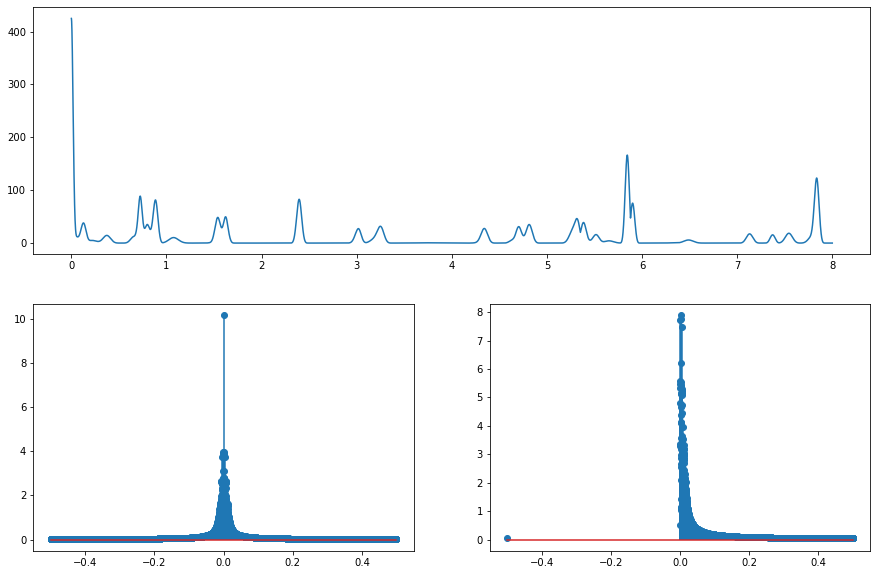

In [110]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(2,1,1)
ax1 = fig.add_subplot(2,2,3)
ax2 = fig.add_subplot(2,2,4)
ax.plot(t,Datos)
ax1.stem(freq,YMag,use_line_collection=True)
ax2.stem(freq2,YMag2,use_line_collection=True)

In [111]:
ii = np.argmax(np.abs(YMag2))
Frecuencia = freq2[ii]
Periodo = 1/freq2[ii]

In [112]:
Periodo

800.0

In [113]:
inverso = fft.copy()

In [114]:
mask1 = freq > freq[ii]
inverso[mask1] = 0

In [115]:
mask2 = freq < freq[ii]
inverso[mask2] = 0

In [116]:
Fundamental = np.fft.ifft(2*inverso)
Fundamental += median

/opt/sagemath-9.3/local/lib/python3.7/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


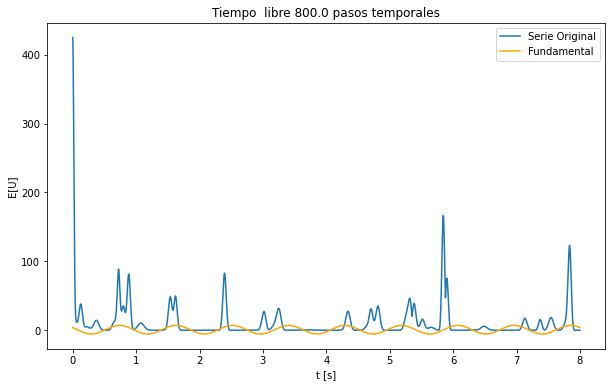

In [117]:
fig1 = plt.figure(figsize=(10,6))
ax_ = fig1.add_subplot(1,1,1)
ax_.plot(t,Datos, label = 'Serie Original')
ax_.plot(t,Fundamental,color='orange', label = 'Fundamental')
ax_.set_title('Tiempo  libre ' + str(round(Periodo,2)) + ' pasos temporales')
ax_.set_xlabel('t [s]') 
ax_.set_ylabel('E[U]') 
ax_.legend(loc = 'upper right')

# 3. Termodinámica

In [118]:
n = 1
Cv = (3/2)*(8.314472)
l = 0.30
A = 0.01
k = 389.6
C = (k*A)/(n*Cv*l)

r0 = [400. , 200.]

N = 50
t = np.linspace(0.,8.,N)

In [119]:
def f0(T1,T2,C):
    return -C*(T1-T2)

def f1(T1,T2,C):
    return C*(T1-T2)

In [120]:
def GetEuler(f0,f1,r0,t):
    
    h = (t[-1] - t[0])/(len(t)-1)
    
    T1 = np.zeros(len(t))
    T2 = np.zeros(len(t))
    
    T1[0] = r0[0]
    T2[0] = r0[1]
    
    K1 = np.zeros(2)
    K2 = np.zeros(2)
    
    for i in range(1,len(t)):
        
        K1[0] = f0(T1[i-1],T2[i-1],C)
        K1[1] = f1(T1[i-1],T2[i-1],C)
        
        K2[0] = f0(T1[i-1] + h*K1[0],T2[i-1] + h*K1[1],C)
        K2[1] = f1(T1[i-1] + h*K1[0],T2[i-1] + h*K1[1],C)
              
        T1[i] = T1[i-1] + 0.5*h*(K1[0]+K2[0])
        T2[i] = T2[i-1] + 0.5*h*(K1[1]+K2[1]) 
        
    return T1,T2

In [121]:
T1,T2 = GetEuler1(f0,f1,r0,t)

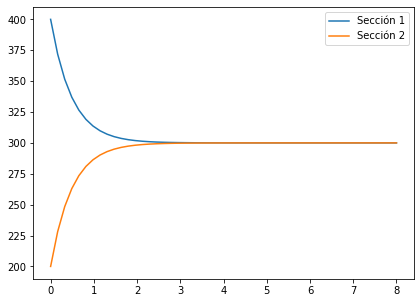

In [122]:
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(121)

ax.plot(t,T1, label='Sección 1')
ax.plot(t,T2, label='Sección 2')
ax.legend()

# 3.2 C++

In [147]:
filename = 'MisDatos.txt'
derivada = np.loadtxt(filename)

In [148]:
def DerivadaExacta(x):
    return -2*x*np.e**(-x**2)

In [149]:
DerivadaE = DerivadaExacta(derivada[:,0])

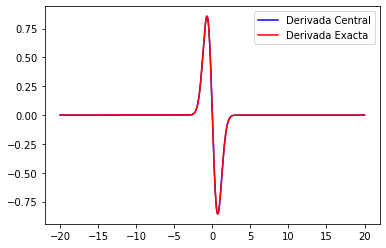

In [150]:
plt.plot(derivada[:,0],derivada[:,1],c='b',label='Derivada Central')
plt.plot(derivada[:,0],DerivadaE,c='r',label='Derivada Exacta')
plt.legend()